<a href="https://colab.research.google.com/github/Massizelle/TP-analyse-d-images/blob/main/tp_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Convolution

**Auteur:** BOUBADJOU massizelle  

In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal
from typing import Tuple
from skimage import data
from google.colab.patches import cv2_imshow

---
# Partie 1: Convolution
---

## Exercice 1: Filtre Moyenneur

In [35]:
def meanFilter(image, p):
    """
    image : image en niveaux de gris
    p     : paramètre du filtre
            taille fenêtre = (2p + 1) x (2p + 1)
    """

    height, width = image.shape

    # image résultat
    result = np.zeros_like(image)

    # taille réelle de la fenêtre
    k = 2 * p + 1

    for i in range(height):
        for j in range(width):

            somme = 0
            compteur = 0

            # parcours de la fenêtre
            for di in range(-p, p + 1):
                for dj in range(-p, p + 1):

                    ni = i + di
                    nj = j + dj

                    # vérification des bornes
                    if 0 <= ni < height and 0 <= nj < width:
                        somme += int(image[ni, nj])
                        compteur += 1

            # moyenne
            result[i, j] = somme // compteur

    return result

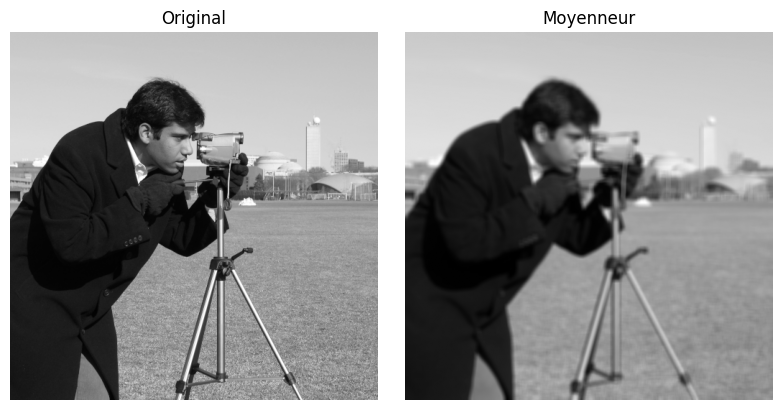

In [53]:
# image de base
img = data.camera()

# filtre moyenneur 7x7 (p = 3)
filtered = meanFilter(img, 3)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img.astype(np.uint8), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(filtered, cmap="gray")
plt.title("Moyenneur")
plt.axis("off")

plt.tight_layout()
plt.show()

## Exercice 2: Produit de Convolution

In [37]:
import numpy as np

def convolution(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:

    h, w = image.shape
    kh, kw = kernel.shape

    # noyau impair
    assert kh % 2 == 1 and kw % 2 == 1, "Kernel must have odd dimensions"

    p_h = kh // 2
    p_w = kw // 2

    padded = np.pad(image, ((p_h, p_h), (p_w, p_w)), mode="edge")

    kernel = np.flip(kernel)

    result = np.zeros((h, w), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            window = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(window * kernel)

    return result

In [38]:
img = data.camera().astype(np.float32)

# noyaux
mean_kernel = np.ones((3,3)) / 9

gaussian = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

laplacian = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

# convolutions
img_mean = convolution(img, mean_kernel)
img_gauss = convolution(img, gaussian)
img_sharp = convolution(img, sharpen)
img_lap = convolution(img, laplacian)

# conversion uint8
img_mean = np.clip(img_mean, 0, 255).astype(np.uint8)
img_gauss = np.clip(img_gauss, 0, 255).astype(np.uint8)
img_sharp = np.clip(img_sharp, 0, 255).astype(np.uint8)
img_lap = np.clip(img_lap, 0, 255).astype(np.uint8)

# ===== AFFICHAGE TABLEAU =====
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img.astype(np.uint8), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(img_mean, cmap="gray")
plt.title("Moyenneur")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(img_gauss, cmap="gray")
plt.title("Gaussien")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(img_sharp, cmap="gray")
plt.title("Réhausseur")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(img_lap, cmap="gray")
plt.title("Laplacien")
plt.axis("off")

plt.tight_layout()
plt.show()


## Exercice 3: Détecteur de Contours de Sobel

In [41]:
def edgeSobel(image: np.ndarray) -> np.ndarray:
    # Noyaux de Sobel (définition standard)
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=np.float32)

    image = image.astype(np.float32)

    # Dérivées partielles
    grad_x = convolution(image, sobel_x)
    grad_y = convolution(image, sobel_y)

    # Norme du gradient (version simplifiée)
    magnitude = np.abs(grad_x) + np.abs(grad_y)

    # Normalisation pour affichage
    magnitude = magnitude / magnitude.max() * 255

    return magnitude.astype(np.uint8)


In [42]:
def edgeSobel_full(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray, Tuple[np.ndarray, np.ndarray]]:

    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=np.float32)

    image = image.astype(np.float32)

    grad_x = convolution(image, sobel_x)
    grad_y = convolution(image, sobel_y)

    # Norme du gradient
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = magnitude / magnitude.max() * 255
    magnitude = magnitude.astype(np.uint8)

    # Direction du gradient
    direction = np.arctan2(grad_y, grad_x)

    return magnitude, direction, (grad_x, grad_y)

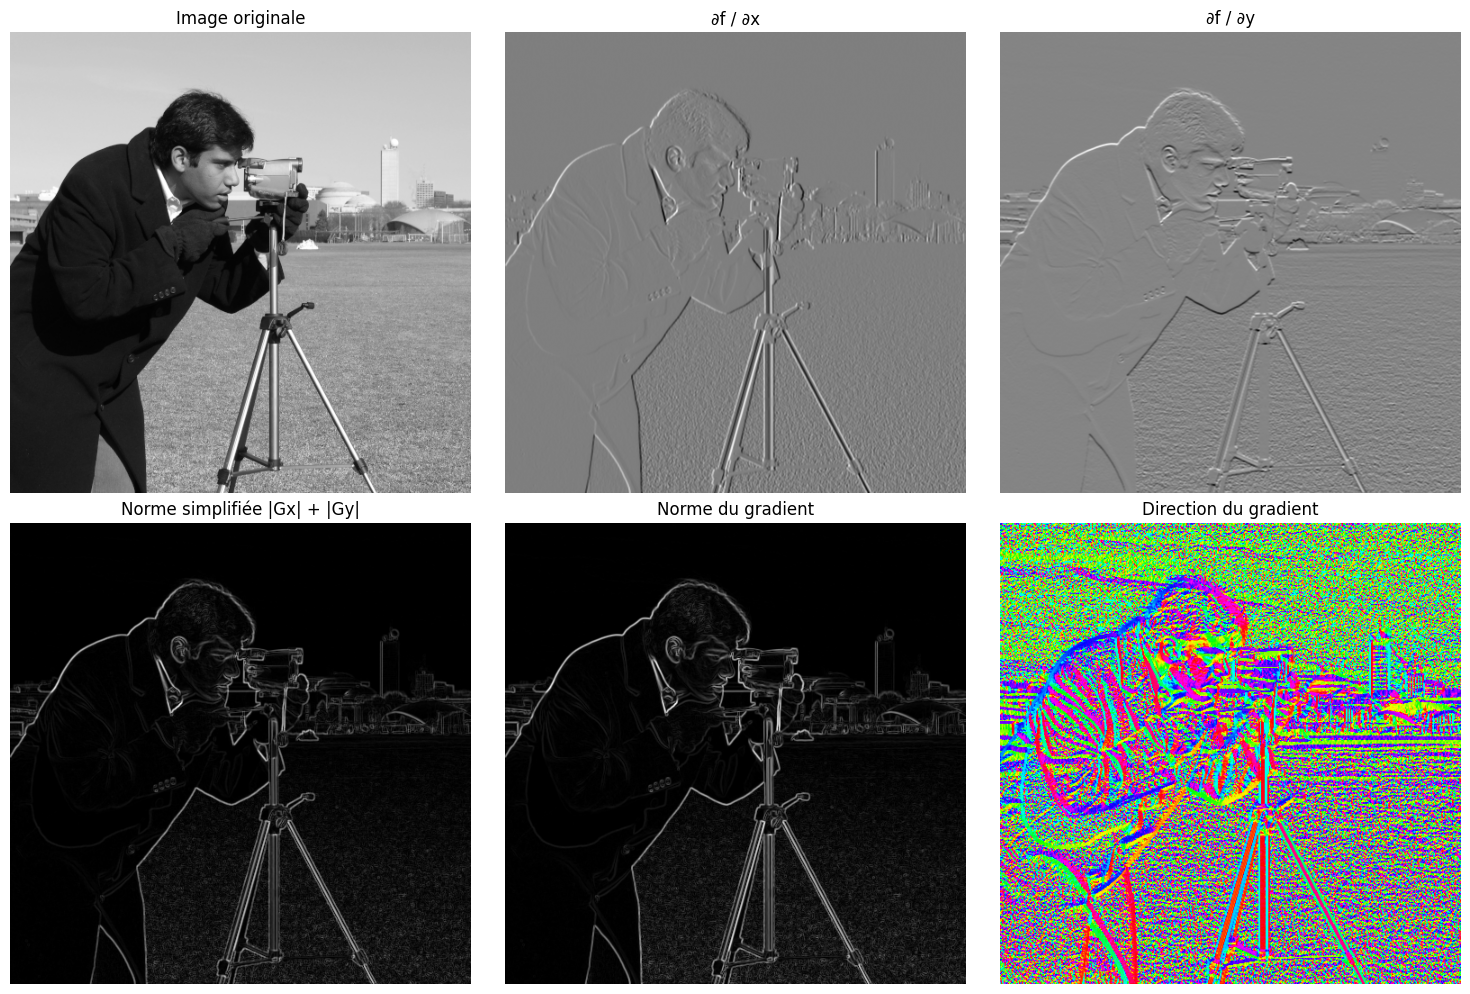

In [43]:
def test_sobel():
    # Image de test
    img = data.camera().astype(np.uint8)

    # Application du Sobel
    edges = edgeSobel(img)
    magnitude, direction, (grad_x, grad_y) = edgeSobel_full(img)

    # Affichage sous forme de tableau
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    axes[0, 0].imshow(img, cmap='gray')
    axes[0, 0].set_title("Image originale")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(grad_x, cmap='gray')
    axes[0, 1].set_title("∂f / ∂x")
    axes[0, 1].axis("off")

    axes[0, 2].imshow(grad_y, cmap='gray')
    axes[0, 2].set_title("∂f / ∂y")
    axes[0, 2].axis("off")

    axes[1, 0].imshow(edges, cmap='gray')
    axes[1, 0].set_title("Norme simplifiée |Gx| + |Gy|")
    axes[1, 0].axis("off")

    axes[1, 1].imshow(magnitude, cmap='gray')
    axes[1, 1].set_title("Norme du gradient")
    axes[1, 1].axis("off")

    axes[1, 2].imshow(direction, cmap='hsv')
    axes[1, 2].set_title("Direction du gradient")
    axes[1, 2].axis("off")

    plt.tight_layout()
    plt.show()
test_sobel()

## Exercice 4: Filtre Bilatéral


In [46]:
def bilateralFilter(image: np.ndarray,
                    d: int,
                    sigma_color: float,
                    sigma_space: float) -> np.ndarray:

    image = image.astype(np.float32)
    rows, cols = image.shape
    result = np.zeros_like(image)

    # taille de fenêtre
    if d <= 0:
        d = int(2 * sigma_space + 1)

    radius = d // 2

    # padding
    padded = np.pad(image, radius, mode='edge')

    # --- pondération spatiale (fixe) ---
    spatial_weight = np.zeros((d, d), dtype=np.float32)

    for i in range(d):
        for j in range(d):
            x = i - radius
            y = j - radius
            spatial_weight[i, j] = np.exp(
                -(x**2 + y**2) / (2 * sigma_space**2)
            )

    # --- filtrage ---
    for i in range(rows):
        for j in range(cols):

            center = padded[i + radius, j + radius]
            window = padded[i:i+d, j:j+d]

            # pondération en intensité
            intensity_weight = np.exp(
                -((window - center) ** 2) / (2 * sigma_color**2)
            )

            # pondération bilatérale
            weights = spatial_weight * intensity_weight

            # normalisation
            result[i, j] = np.sum(window * weights) / np.sum(weights)

    return np.clip(result, 0, 255).astype(np.uint8)

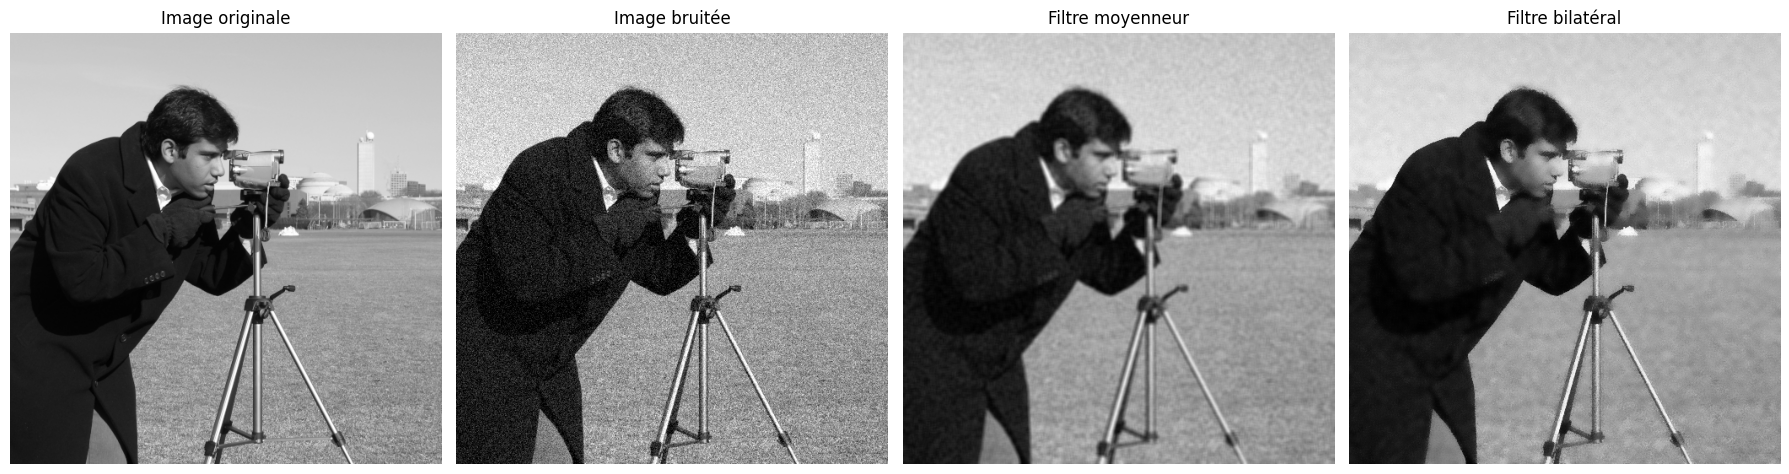

In [45]:
def test_bilateral():

    img = data.camera().astype(np.uint8)

    # ajout de bruit
    noise = np.random.normal(0, 20, img.shape)
    noisy = np.clip(img + noise, 0, 255).astype(np.uint8)

    # filtres
    mean_img = meanFilter(noisy, 2)
    bilateral = bilateralFilter(noisy, d=9,
                                sigma_color=50,
                                sigma_space=50)

    # affichage tableau
    fig, axes = plt.subplots(1, 4, figsize=(18, 5))

    axes[0].imshow(img, cmap='gray')
    axes[0].set_title("Image originale")
    axes[0].axis("off")

    axes[1].imshow(noisy, cmap='gray')
    axes[1].set_title("Image bruitée")
    axes[1].axis("off")

    axes[2].imshow(mean_img, cmap='gray')
    axes[2].set_title("Filtre moyenneur")
    axes[2].axis("off")

    axes[3].imshow(bilateral, cmap='gray')
    axes[3].set_title("Filtre bilatéral")
    axes[3].axis("off")

    plt.tight_layout()
    plt.show()
test_bilateral()

## Exercice 5: Filtre Médian


In [48]:
def median(image: np.ndarray, k: int) -> np.ndarray:

    rows, cols = image.shape
    result = np.zeros_like(image, dtype=np.uint8)
    window_size = 2 * k + 1

    # Padding
    padded = np.pad(image, k, mode='edge')

    # Application du filtre médian
    for i in range(rows):
        for j in range(cols):
            window = padded[i:i+window_size, j:j+window_size]
            result[i, j] = np.median(window)

    return result

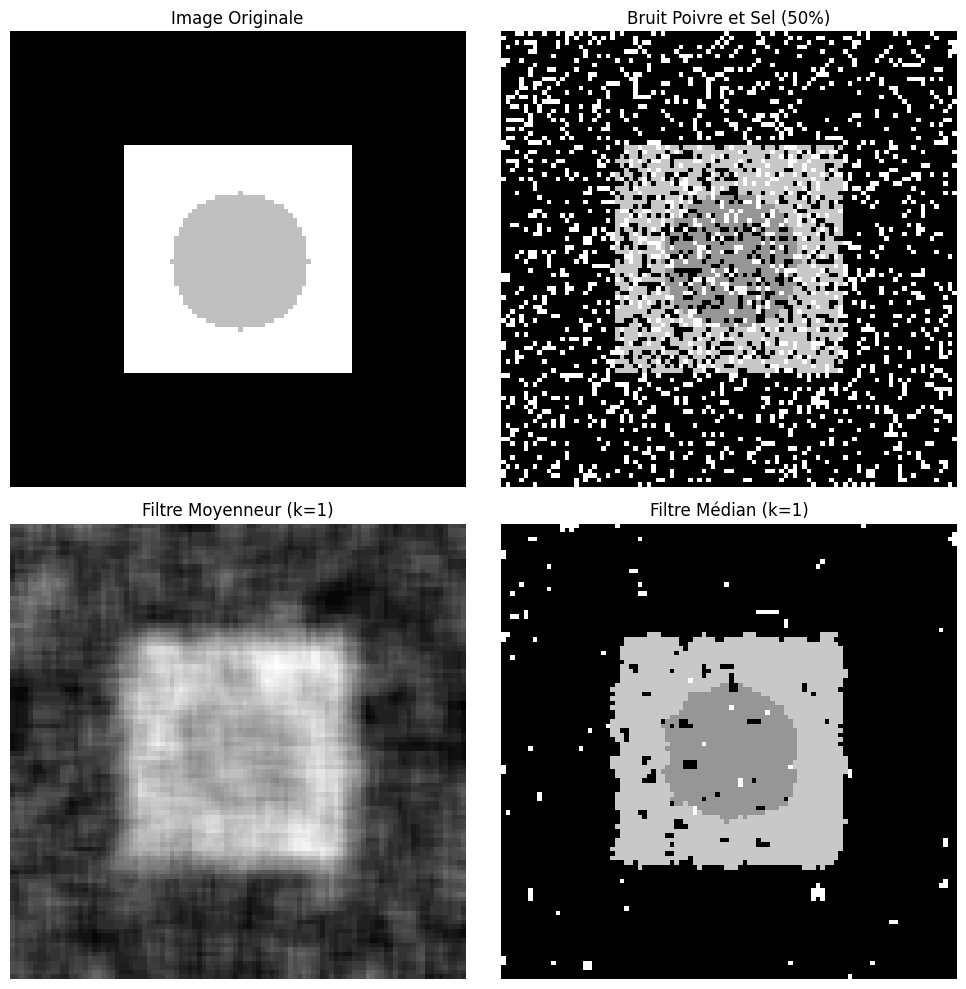

In [55]:
def test_median():
    # Image de test
    test_img = np.zeros((100, 100), dtype=np.uint8)
    test_img[25:75, 25:75] = 200
    cv2.circle(test_img, (50, 50), 15, 150, -1)

    # Bruit poivre et sel
    noisy_img = add_salt_pepper_noise(test_img, amount=0.5)

    # Application des filtres
    # Application des filtres
    median_filtered = median(noisy_img, k=1)
    mean_filtered = meanFilter(noisy_img, 2*1 + 1)  # équivalent à k=1

    # Affichage tableau
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    axes[0, 0].imshow(test_img, cmap='gray')
    axes[0, 0].set_title('Image Originale')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(noisy_img, cmap='gray')
    axes[0, 1].set_title('Bruit Poivre et Sel (50%)')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(mean_filtered, cmap='gray')
    axes[1, 0].set_title('Filtre Moyenneur (k=1)')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(median_filtered, cmap='gray')
    axes[1, 1].set_title('Filtre Médian (k=1)')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

test_median()